In [47]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV 

# Heart Disease Prediction Using Machine Learning

Task 1:Data Understanding and Preprocessing

1. Load the dataset and perform an initial inspection (e.g., shape, column names, data types).
2. Handle missing values, if any, and check for data inconsistencies.
3. Standardize or normalize continuous features
4. Create exploratory data visualizations to understand feature distributions, correlations, and relationships.


### Data Preprocessing
The following are the preprocessing steps that were carried out:
- 	
Loading the Data: The pandas read_csv method was used to load the datas
- •	Understanding the Data: This was done by first observing the first five rows of the data and then we perform some descriptive statistics to further understand the featur
- •	Handling Missing Data: Missing values were investigated using the pandas isnull method. However, no missing value was detecte
- •	Feature Engineering: No feature transformation was performed, but the target variable was separated from the independent features. Further, there were no categorical features so the necessary encoding on the categorical features was skipp
- •	Data Normalization: After inspecting the correlation between the features, I observe that there was little or no correlation between them and therefore used polynomial features to capture non linear relationshi
- •	Splitting the Dataset: Data was split into training and testing sets using an 80%_ train, 20%_test ratio.


In [48]:
# Load the dataset
file_path = r"C:\Users\GABRIEL\Desktop\DataSet\machine learning\Dataset\Final Assessment Dataset_heart.csv"
dataset = pd.read_csv(file_path)
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [50]:
dataset.shape

(1025, 14)

In [51]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [52]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [53]:
dataset.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [54]:
# Handling missing values and inconsistency
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Exploratory Data Analysis 
### Plots
#### Task 2: Feature Selection
Use statistical methods (e.g., correlation, chi-squared test) to identify features most relevant to predicting heart disease.
Drop features that are irrelevant or provide little predictive value.


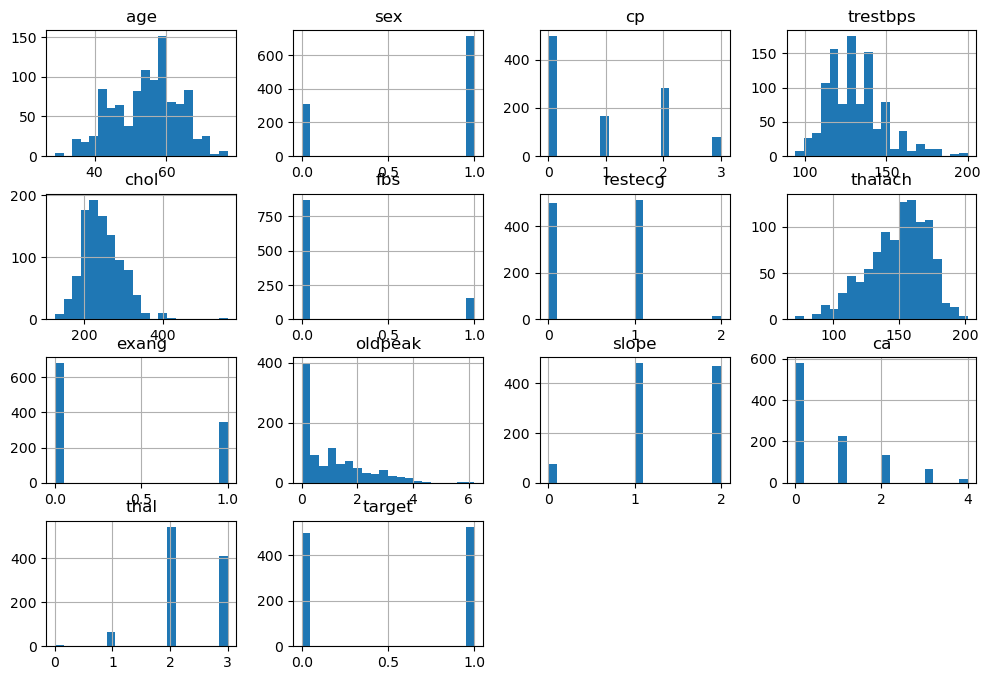

C:\Users\GABRIEL\AppData\Local\Temp\ipykernel_16092\1332951986.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset["chol"], shade=True)


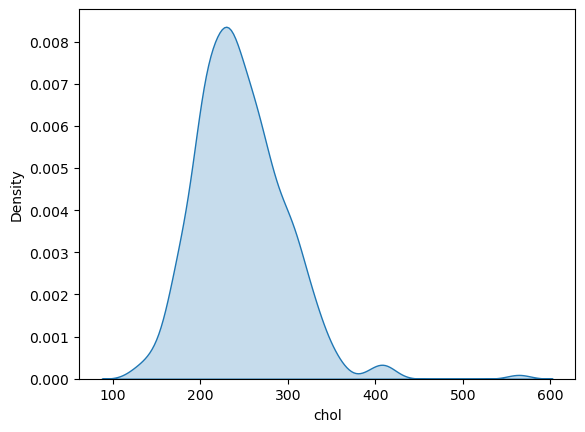

In [55]:
# These help us understand how the numerical variables are distributed.
# Plot histogram for numerical features
dataset.hist(figsize=(12, 8), bins=20)
plt.show()

# Kernel Density Estimation (KDE) plot for `chol` (cholesterol)
sns.kdeplot(dataset["chol"], shade=True)
plt.show()

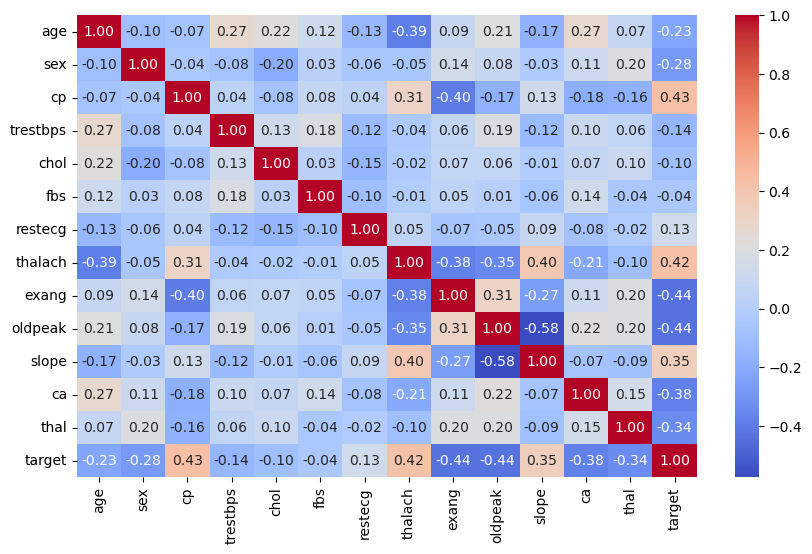

In [56]:
# Compute correlation matrix
correlation_matrix = dataset.corr() # This will help us identify the most relevant features for prediction

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

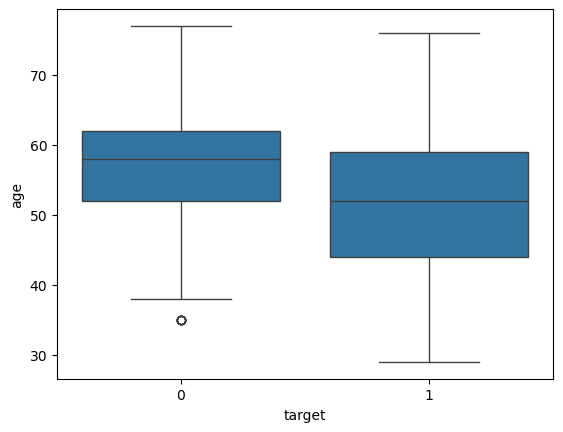

In [57]:
# To check if older people are more likely to have heart disease.
sns.boxplot(x=dataset["target"], y=dataset["age"])
plt.show()

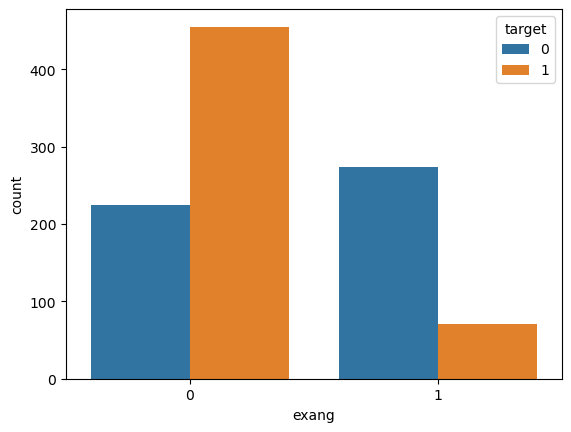

In [58]:
# To check if exercise-related pain is an indicator of heart disease.
sns.countplot(x=dataset["exang"], hue=dataset["target"])
plt.show()

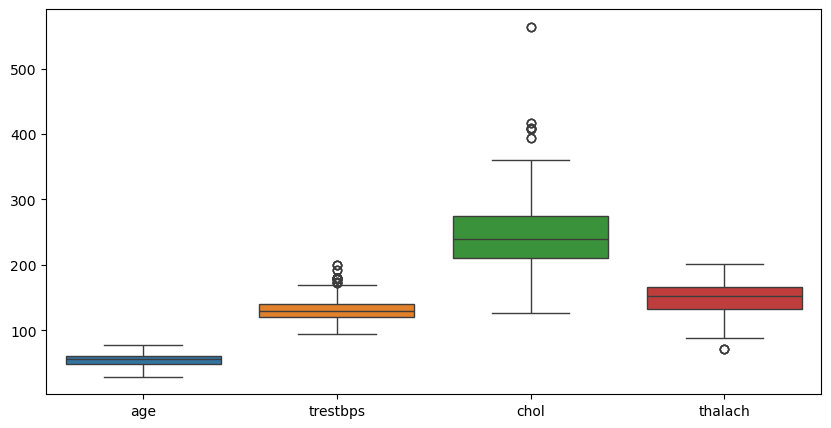

In [59]:
# This will help identify extreme values that may affect the model.
plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset[["age", "trestbps", "chol", "thalach"]])
plt.show()

#### Model Selection
+ Algorithm Choice: Due to the nature of the problem (binary classification problem), Logistic regression was chosen as it offers the best approach to our problem.
+ Hyper parameter Tuning: Performed using GridSearchCV
+ Optimization: Addressed overfitting using techniques such as regularization and dropout.
+ Training Process: The model was trained using [specific optimizer, loss function, and evaluation metrics.
+ Scaling: The features were scaled using standard scaler


In [60]:
# Split the dataset into training set and testing set
X = dataset.drop("target", axis=1)
Y = dataset["target"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [61]:
# Apply polynomial features
polyn = PolynomialFeatures(degree=2)
X_train = polyn.fit_transform(X_train)
X_test = polyn.transform(X_test)

In [62]:
# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [63]:
# Create a logistic regression model
model = LogisticRegression(max_iter=500)

# Fit the model
model = model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

### Performance Metrics
We used the below listed metrics
- Accuracy score
- Confusion matrix
- Classification report

In [64]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")

# Generate confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.8682926829268293
Confusion Matrix:
[[86 16]
 [11 92]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       102
           1       0.85      0.89      0.87       103

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



In [65]:
# Perform hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_S = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5)

# Fit GridSearchCV
grid_S.fit(X_train, Y_train)

# Print best parameters and best estimator
print("Best Parameters:", grid_S.best_params_)
print("Best Estimator:", grid_S.best_estimator_)

C:\Users\GABRIEL\anaconda3\envs\Gabby\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\GABRIEL\anaconda3\envs\Gabby\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Best Parameters: {'C': 1000}
Best Estimator: LogisticRegression(C=1000)


C:\Users\GABRIEL\anaconda3\envs\Gabby\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\GABRIEL\anaconda3\envs\Gabby\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

In [66]:
# Make predictions with the best model
Y_pred = grid_S.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(Y_test, Y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.9560975609756097
Confusion Matrix:
[[97  5]
 [ 4 99]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       102
           1       0.95      0.96      0.96       103

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



In [67]:

# Perform hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_S = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5)

# Fit GridSearchCV
grid_S.fit(X_train, Y_train)

# Print best parameters and best estimator
print("Best Parameters:", grid_S.best_params_)
print("Best Estimator:", grid_S.best_estimator_)

# Make predictions with the best model
Y_pred = grid_S.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(Y_test, Y_pred)
print("Classification Report:")
print(class_report)


C:\Users\GABRIEL\anaconda3\envs\Gabby\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\GABRIEL\anaconda3\envs\Gabby\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Best Parameters: {'C': 1000}
Best Estimator: LogisticRegression(C=1000)
Accuracy: 0.9560975609756097
Confusion Matrix:
[[97  5]
 [ 4 99]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       102
           1       0.95      0.96      0.96       103

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205

